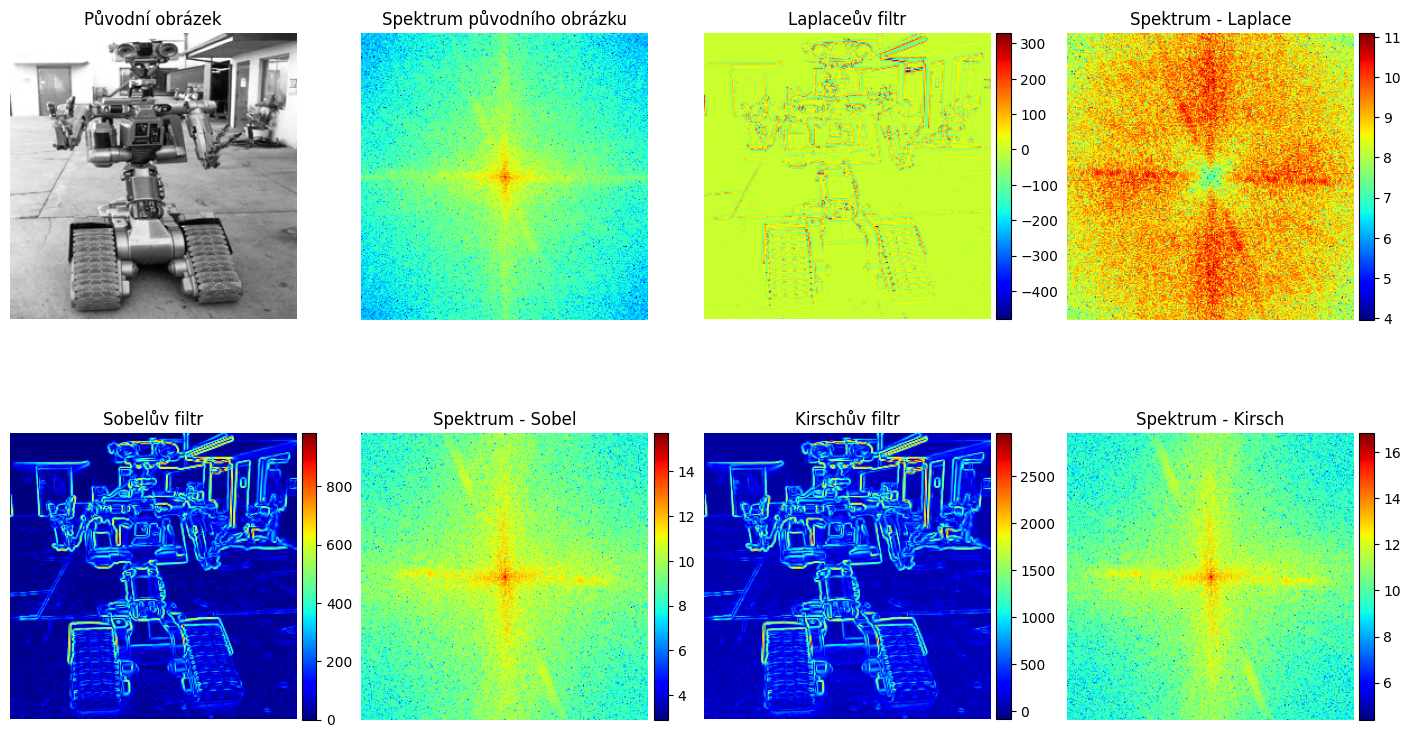

In [4]:
# made by Martin "Granc3k" Šimon, Jakub "Parrot2" Keršláger
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Načtení obrázku
image_path = Path("./data/cv04c_robotC.bmp")
image = cv2.imread(image_path.as_posix(), cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)


# Funkce pro výpočet spektra
def compute_spectrum(img):
    return np.log(np.abs(np.fft.fftshift(np.fft.fft2(img))))


# Laplaceův filtr
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian = cv2.filter2D(image, -1, laplacian_kernel)

# Sobelův filtr
sobel_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_images = [cv2.filter2D(image, -1, np.rot90(sobel_kernel, x)) for x in range(8)]
sobel = np.max(sobel_images, axis=0)

# Kirschův filtr
kirsch_kernel = np.array([[3, 3, 3], [3, 0, 3], [-5, -5, -5]])
kirsch_images = [cv2.filter2D(image, -1, np.rot90(kirsch_kernel, x)) for x in range(8)]
kirsch = np.max(kirsch_images, axis=0)

# Vykreslení výsledků
fig, axes = plt.subplots(2, 4, figsize=(14, 8), constrained_layout=True)
axes = axes.ravel()

# Původní obrázek
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Původní obrázek")
axes[0].axis("off")

# Spektrum původního obrázku
axes[1].imshow(compute_spectrum(image), cmap="jet")
axes[1].set_title("Spektrum původního obrázku")
axes[1].axis("off")

# Laplace
im = axes[2].imshow(laplacian, cmap="jet")
axes[2].set_title("Laplaceův filtr")
axes[2].axis("off")
plt.colorbar(im, ax=axes[2], fraction=0.05, pad=0.02)

im = axes[3].imshow(compute_spectrum(laplacian), cmap="jet")
axes[3].set_title("Spektrum - Laplace")
axes[3].axis("off")
plt.colorbar(im, ax=axes[3], fraction=0.05, pad=0.02)

# Sobel
im = axes[4].imshow(sobel, cmap="jet")
axes[4].set_title("Sobelův filtr")
axes[4].axis("off")
plt.colorbar(im, ax=axes[4], fraction=0.05, pad=0.02)

im = axes[5].imshow(compute_spectrum(sobel), cmap="jet")
axes[5].set_title("Spektrum - Sobel")
axes[5].axis("off")
plt.colorbar(im, ax=axes[5], fraction=0.05, pad=0.02)

# Kirsch
im = axes[6].imshow(kirsch, cmap="jet")
axes[6].set_title("Kirschův filtr")
axes[6].axis("off")
plt.colorbar(im, ax=axes[6], fraction=0.05, pad=0.02)

im = axes[7].imshow(compute_spectrum(kirsch), cmap="jet")
axes[7].set_title("Spektrum - Kirsch")
axes[7].axis("off")
plt.colorbar(im, ax=axes[7], fraction=0.05, pad=0.02)

plt.show()